In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import pipeline

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.shape

(568454, 10)

In [5]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

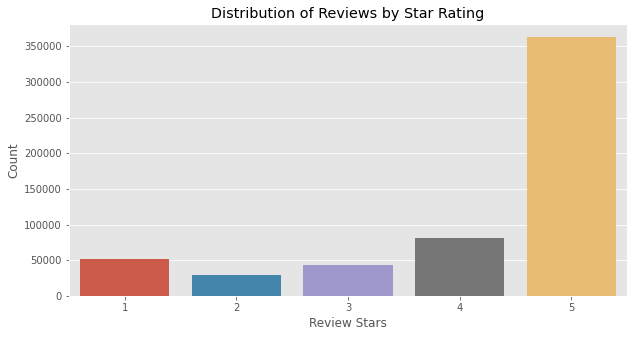

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Score')
plt.title('Distribution of Reviews by Star Rating')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Reviews by customers'}, ylabel='count'>

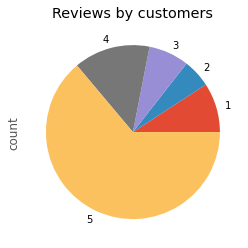

In [7]:
df['Score'].value_counts().sort_index().plot(kind='pie', title="Reviews by customers")

In [8]:
df['UserId'].value_counts()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df = df.head(1000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [11]:
# for i in range(11):
#     text = df.Text[i]
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show() 

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aryar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
def process_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in stop_words]
    freq_dist = FreqDist(tokens)
    parts_of_speech = nltk.pos_tag(tokens)
    return {
        'tokens': tokens,
        'freq_dist': freq_dist,
        'most_common': freq_dist.most_common(3),
        'parts_of_speech': parts_of_speech
    }

In [15]:
df['processed'] = df['Text'].apply(process_text)
df['processed']

0      {'tokens': ['bought', 'several', 'Vitality', '...
1      {'tokens': ['Product', 'arrived', 'labeled', '...
2      {'tokens': ['confection', 'around', 'centuries...
3      {'tokens': ['looking', 'secret', 'ingredient',...
4      {'tokens': ['Great', 'taffy', 'great', 'price'...
                             ...                        
995    {'tokens': ['BLACK', 'MARKET', 'HOT', 'SAUCE',...
996    {'tokens': ['Man', 'say', 'salsa', 'bomb', 'di...
997    {'tokens': ['sauce', 'good', 'anything', 'like...
998    {'tokens': ['hot', 'Like', 'low', 'star', 'rev...
999    {'tokens': ['admit', 'sucker', 'large', 'quant...
Name: processed, Length: 1000, dtype: object

In [16]:
for i in range(len(df)): 
    row_processed = df['processed'].iloc[i]
    tokens = row_processed['tokens']
    print(f"Row {i} tokens: {tokens}")

Row 0 tokens: ['bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'Labrador', 'finicky', 'appreciates', 'product', 'better']
Row 1 tokens: ['Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'Jumbo']
Row 2 tokens: ['confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'Filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'Lewis', 'Lion', 'Witch', 'Wardrobe', 'treat', 'seduces', 'Edmund', 'selling', 'Brother', 'Sisters', 'Witch']
Row 3 tokens: ['looking', 'secret', 'ingredient', 'Robitussin', 'believe', 'found', 'got', 'addition', 'Root', 'Beer', 'Extract', 'or

In [17]:
for i in range(len(df)): 
    row_processed = df['processed'].iloc[i]
    freq_dist = row_processed['freq_dist']
    print(f"Row {i} frequency distribution: {freq_dist}")  

Row 0 frequency distribution: <FreqDist with 21 samples and 23 outcomes>
Row 1 frequency distribution: <FreqDist with 17 samples and 18 outcomes>
Row 2 frequency distribution: <FreqDist with 36 samples and 39 outcomes>
Row 3 frequency distribution: <FreqDist with 18 samples and 18 outcomes>
Row 4 frequency distribution: <FreqDist with 11 samples and 13 outcomes>
Row 5 frequency distribution: <FreqDist with 34 samples and 36 outcomes>
Row 6 frequency distribution: <FreqDist with 25 samples and 26 outcomes>
Row 7 frequency distribution: <FreqDist with 11 samples and 11 outcomes>
Row 8 frequency distribution: <FreqDist with 11 samples and 11 outcomes>
Row 9 frequency distribution: <FreqDist with 14 samples and 15 outcomes>
Row 10 frequency distribution: <FreqDist with 54 samples and 68 outcomes>
Row 11 frequency distribution: <FreqDist with 22 samples and 28 outcomes>
Row 12 frequency distribution: <FreqDist with 32 samples and 39 outcomes>
Row 13 frequency distribution: <FreqDist with 9 

In [18]:
for i in range(len(df)): 
    row_processed = df['processed'].iloc[i]
    most_common = row_processed['most_common']    
    print(f"Row {i} most common words: {most_common}")    

Row 0 most common words: [('product', 2), ('better', 2), ('bought', 1)]
Row 1 most common words: [('Jumbo', 2), ('Product', 1), ('arrived', 1)]
Row 2 most common words: [('tiny', 2), ('treat', 2), ('Witch', 2)]
Row 3 most common words: [('looking', 1), ('secret', 1), ('ingredient', 1)]
Row 4 most common words: [('taffy', 3), ('Great', 1), ('great', 1)]
Row 5 most common words: [('taffy', 3), ('got', 1), ('wild', 1)]
Row 6 most common words: [('candy', 2), ('saltwater', 1), ('taffy', 1)]
Row 7 most common words: [('taffy', 1), ('good', 1), ('soft', 1)]
Row 8 most common words: [('Right', 1), ('mostly', 1), ('sprouting', 1)]
Row 9 most common words: [('dog', 2), ('healthy', 1), ('food', 1)]
Row 10 most common words: [('br', 6), ('sauce', 5), ('hot', 3)]
Row 11 most common words: [('food', 4), ('chubby', 2), ('higher', 2)]
Row 12 most common words: [('food', 4), ('new', 3), ('cats', 2)]
Row 13 most common words: [('good', 1), ('flavor', 1), ('came', 1)]
Row 14 most common words: [('Strawb

In [19]:
for i in range(len(df)): 
    row_processed = df['processed'].iloc[i]
    parts_of_speech = row_processed['parts_of_speech']
    print(f"Row {i} parts of speech: {parts_of_speech}")

Row 0 parts of speech: [('bought', 'VBD'), ('several', 'JJ'), ('Vitality', 'NNP'), ('canned', 'VBD'), ('dog', 'RP'), ('food', 'NN'), ('products', 'NNS'), ('found', 'VBD'), ('good', 'JJ'), ('quality', 'NN'), ('product', 'NN'), ('looks', 'VBZ'), ('like', 'IN'), ('stew', 'NN'), ('processed', 'VBN'), ('meat', 'NN'), ('smells', 'NNS'), ('better', 'RBR'), ('Labrador', 'NNP'), ('finicky', 'JJ'), ('appreciates', 'NNS'), ('product', 'NN'), ('better', 'RBR')]
Row 1 parts of speech: [('Product', 'NNP'), ('arrived', 'VBD'), ('labeled', 'JJ'), ('Jumbo', 'NNP'), ('Salted', 'NNP'), ('Peanuts', 'NNP'), ('peanuts', 'VBZ'), ('actually', 'RB'), ('small', 'JJ'), ('sized', 'VBN'), ('unsalted', 'JJ'), ('sure', 'JJ'), ('error', 'NN'), ('vendor', 'NN'), ('intended', 'VBN'), ('represent', 'JJ'), ('product', 'NN'), ('Jumbo', 'NNP')]
Row 2 parts of speech: [('confection', 'NN'), ('around', 'IN'), ('centuries', 'NNS'), ('light', 'JJ'), ('pillowy', 'NNS'), ('citrus', 'VBP'), ('gelatin', 'NN'), ('nuts', 'NNS'), ('c

In [20]:
SIA=SentimentIntensityAnalyzer()
SIA

In [21]:
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(df,how='left')
Vaders

  0%|          | 0/1000 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'tokens': ['bought', 'several', 'Vitality', '..."
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'tokens': ['Product', 'arrived', 'labeled', '..."
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'tokens': ['confection', 'around', 'centuries..."
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'tokens': ['looking', 'secret', 'ingredient',..."
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'tokens': ['Great', 'taffy', 'great', 'price'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,"{'tokens': ['BLACK', 'MARKET', 'HOT', 'SAUCE',..."
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i...","{'tokens': ['Man', 'say', 'salsa', 'bomb', 'di..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...,"{'tokens': ['sauce', 'good', 'anything', 'like..."
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...,"{'tokens': ['hot', 'Like', 'low', 'star', 'rev..."


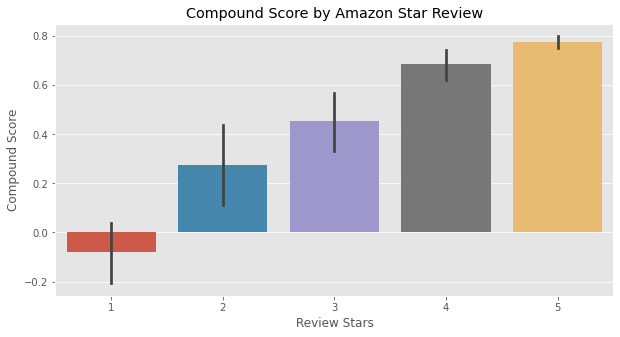

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=Vaders, x='Score', y='compound')
plt.title('Compound Score by Amazon Star Review')
plt.xlabel('Review Stars')
plt.ylabel('Compound Score')
plt.show()

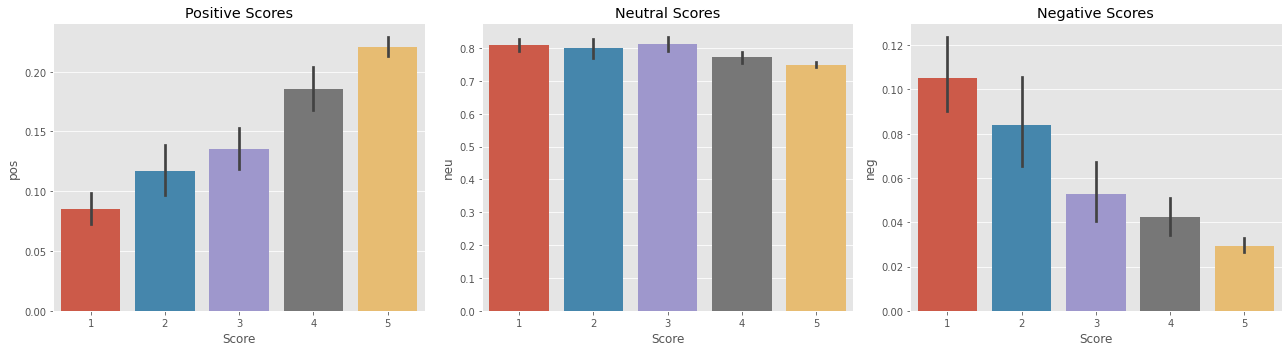

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(data=Vaders, x='Score', y='pos', ax=axes[0])
axes[0].set_title('Positive Scores')
sns.barplot(data=Vaders, x='Score', y='neu', ax=axes[1])
axes[1].set_title('Neutral Scores')
sns.barplot(data=Vaders, x='Score', y='neg', ax=axes[2])
axes[2].set_title('Negative Scores')
plt.tight_layout()
plt.show()

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
MODEL

'cardiffnlp/twitter-roberta-base-sentiment'

In [25]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)
tokenizer

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [26]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [27]:
def roberta_polarity_scores(sentence):
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke at id: {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke at id: 83
Broke at id: 187
Broke at id: 529
Broke at id: 540
Broke at id: 746
Broke at id: 863


In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'tokens': ['bought', 'several', 'Vitality', '..."
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'tokens': ['Product', 'arrived', 'labeled', '..."
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'tokens': ['confection', 'around', 'centuries..."
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'tokens': ['looking', 'secret', 'ingredient',..."
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'tokens': ['Great', 'taffy', 'great', 'price'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,996,0.026,0.721,0.253,0.9788,0.001335,0.006112,0.992553,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,"{'tokens': ['BLACK', 'MARKET', 'HOT', 'SAUCE',..."
990,997,0.000,0.786,0.214,0.9309,0.002649,0.016077,0.981274,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i...","{'tokens': ['Man', 'say', 'salsa', 'bomb', 'di..."
991,998,0.000,0.673,0.327,0.9634,0.001362,0.011372,0.987266,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...,"{'tokens': ['sauce', 'good', 'anything', 'like..."
992,999,0.063,0.874,0.062,-0.0129,0.661606,0.293687,0.044707,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...,"{'tokens': ['hot', 'Like', 'low', 'star', 'rev..."


In [30]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'processed'],
      dtype='object')

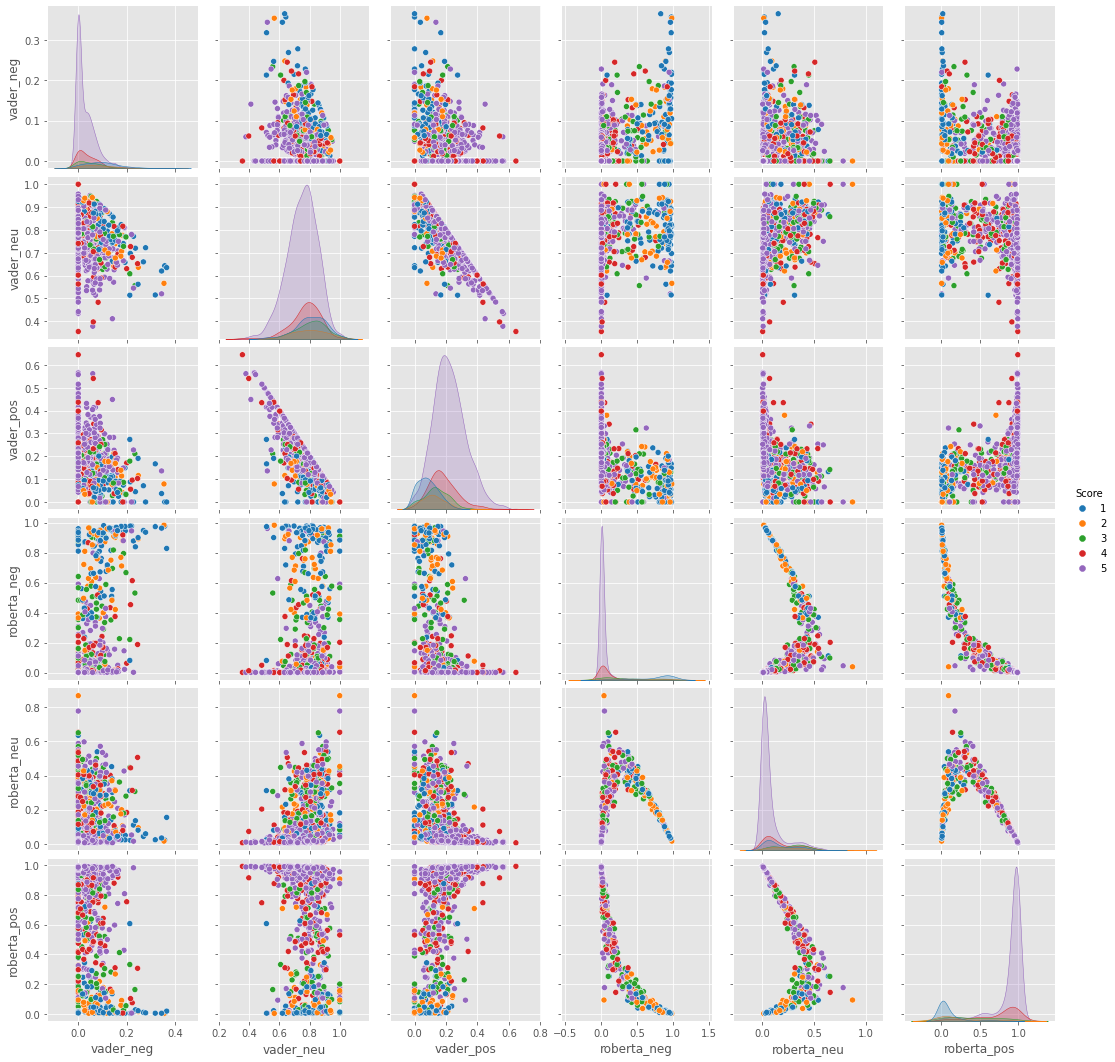

In [31]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()